In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import  load_model

# Loading Model

In [2]:
Model=load_model("C:/Users/amish/Face-Mask-Detection-master/face-mask-detector/model.h5")

In [3]:
Mapping = {0 : 'Mask On',
           1 : 'Please Wear Mask!'
    }

Color_map = {
        0 : (0,255,0),
        1 : (0,0,255)
    }

def Img_prep(pth):
    return cv2.resize(pth,(224,224)).reshape(1,224,224,3)/255.0    # resize and rescale 

# simple one face trial

In [4]:
def single_img_detect(impath):
    """
    impath= path of image
    """
    img=cv2.imread(impath)

    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    plt.close()


    final_img=Img_prep(img)
    print("shape for feeding in model: ",final_img.shape)
    print(Mapping[Model.predict(final_img).argmax()] )  # 1: no mask
                                                    # 0: mask


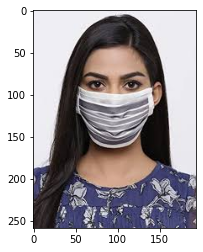

shape for feeding in model:  (1, 224, 224, 3)
Mask On


In [6]:
single_img_detect("D:/researchpapers/girlwithimage.jpg")

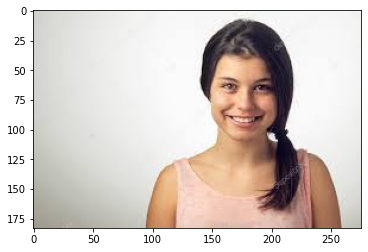

shape for feeding in model:  (1, 224, 224, 3)
Please Wear Mask!


In [7]:
single_img_detect("D:/researchpapers/girlwithhappyface.jpg")

# Multiple Face Trial

In [13]:
def detect_multiple(im_path):
  """
  im_path = string 
  """

  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

  img=cv2.imread(im_path)


  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap="gray")
  plt.title("Original Image")

  faces= face_cascade.detectMultiScale(gray,1.1,4)   # x,y,w,h
 

  for x,y,w,h in faces:   # x=x of first corner pixel i.e. point A in above figure, y= y of first corner pixel, h= height , w= width 
    roi_gray= gray[y:y+h, x:x+w]
    roi_color=img[y:y+h, x:x+w]

  
  

    facess=face_cascade.detectMultiScale(roi_gray)
   
    if len(facess)==0:
      #print("No faces Detected! ")
      continue
    else :
      for ex,ey,ew,eh in facess: 
        face_roi=roi_color[ey:ey+eh, ex:ex+ew]
        pred=Model.predict(Img_prep(face_roi))
        pred=pred.argmax()
        cv2.rectangle(img,(x,y), (x+w, y+h), Color_map[pred],10)
        cv2.putText(img, Mapping[pred],(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,Color_map[pred],2) 


  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.title("Detected Mask- No Mask")
  plt.show()

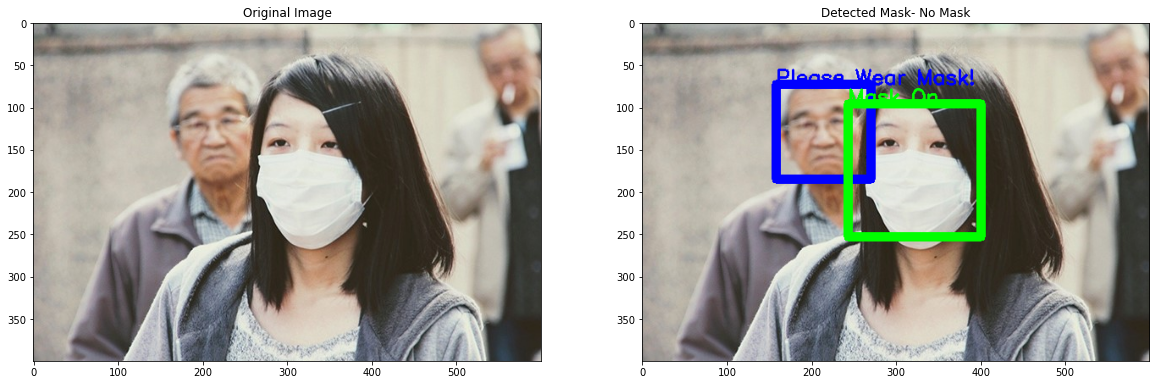

In [25]:
detect_multiple("D:/researchpapers/3.jpg")

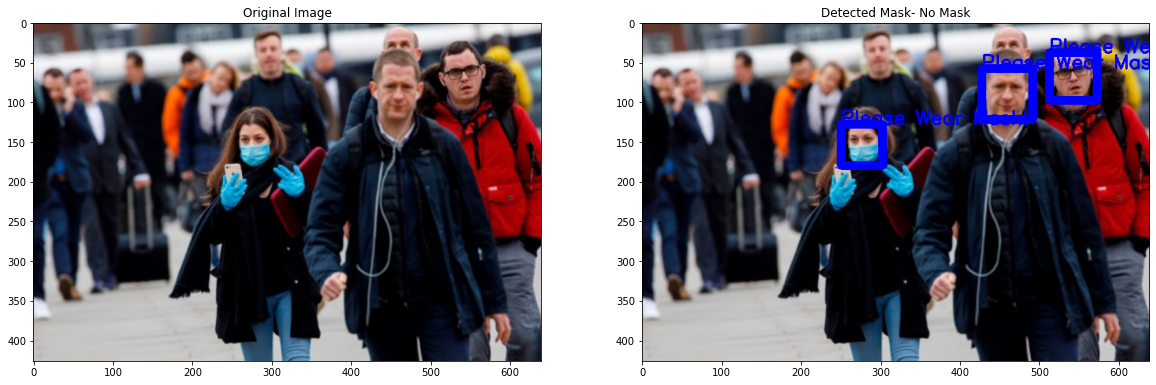

In [19]:
detect_multiple("D:/researchpapers/2.jpg")